## Description 

This notebook will parse the complex Vacuum Furnace file and will only retrieve the time_stamp and the temperature. 


**Vacuum_Furnace.txt**
```
9/2/2015  4:29:19 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	8.000000	OT Temp	107.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	95.000000	
9/2/2015  4:29:41 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	3.000000	OT Temp	109.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	99.000000	
9/2/2015  4:30:03 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	5.000000	OT Temp	111.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	103.000000	
9/2/2015  4:30:25 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	8.000000	OT Temp	113.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	104.000000	
9/2/2015  4:30:46 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	8.000000	OT Temp	114.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	106.000000	
9/2/2015  4:31:10 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	4.000000	OT Temp	119.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	111.000000	
9/2/2015  4:31:32 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	7.000000	OT Temp	123.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	113.000000

...

```

An ascii file with those infos will be created and will be used by the step3 notebook

The following comma separated file will be created

**temperature_spectrum.csv**
```
1441225042.0,22.0
1441225064.0,22.0
1441225086.0,22.0
1441225107.0,22.0
1441225129.0,22.0
1441225151.0,22.0
1441225172.0,22.0
1441225194.0,22.0
1441225216.0,22.0
1441225238.0,22.0
1441225259.0,22.0
1441225281.0,22.0
1441225303.0,22.0
1441225325.0,23.0
1441225346.0,25.0
1441225368.0,27.0
1441225390.0,30.0
1441225412.0,33.0
1441225433.0,36.0
1441225455.0,40.0
1441225477.0,43.0
1441225499.0,47.0
1441225520.0,51.0
1441225542.0,54.0
1441225564.0,57.0
1441225586.0,62.0
...
```

where the first column is the time stamp in seconds since 1970 (this is a scale used to match file and furnace time), and the second column is the Temperature of the Furnace.


## Import 

In [1]:
verbose = True

import time
import datetime
import os
import glob
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib notebook

import pandas as pd
import numpy as np

from ipywidgets import widgets
from IPython.display import display

import gui_widgets
import config_handler
import time_utility
import file_handler

In [2]:
%gui qt

## Select Vacuum Furnace File 

temperature_file = 'Vacuum_Furnace.txt'

Before removing empty columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Data columns (total 20 columns):
index              12987 non-null object
None               12987 non-null object
furnace vacuum2    12987 non-null float64
None.1             12987 non-null object
furnace vacuum1    12987 non-null float64
None.2             12987 non-null object
tolerance          12987 non-null float64
None.3             12987 non-null object
%power             12987 non-null float64
None.4             12987 non-null object
OT Temp            12987 non-null float64
None.5             12987 non-null object
Ramp SP            12987 non-null float64
None.6             12987 non-null object
OT SP              12987 non-null float64
None.7             12987 non-null object
Setpoint           12987 non-null float64
None.8             12987 non-null object
Sample             12987 non-null float64
None.9             0 non-null float64
dtypes: float64(10), object(10)
mem

<IPython.core.display.Javascript object>


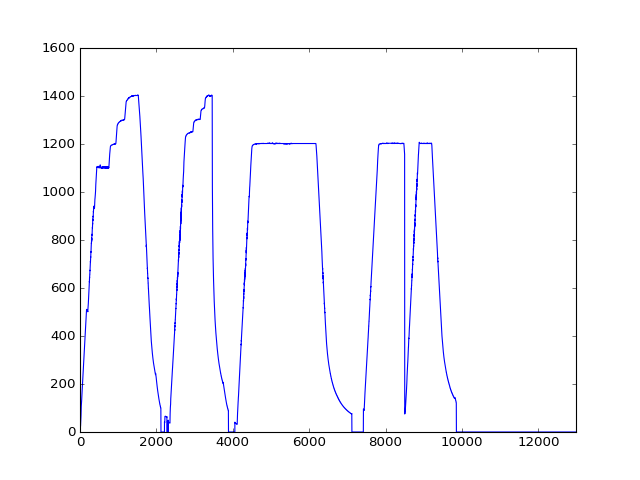

In [7]:
root_folder = config_handler.load_config(key = 'root_folder', \
                                         default_value = '/Volumes/my_book_thunderbolt_duo/IPTS/sebastien/')

full_temperature_file = gui_widgets.gui_fname(dir = root_folder, message="Select the Vacuum Furnace File", ext='txt')

my_header = [None, "furnace vacuum2", None, "furnace vacuum1", None, "tolerance",
            None, "%power", None, "OT Temp", None, "Ramp SP", None,
            "OT SP", None, "Setpoint", None, "Sample", None]
df = pd.read_csv(full_temperature_file[0], sep='\t', names=my_header, )
df = df.reset_index()

if verbose:
    print("Before removing empty columns")
    df.info()
    df.head()

try:
    del df[None] #removing empty columns
except:
    pass

if verbose:
    print("After removing empty columns")
    df.head()

# removing useless columns
new_df = df.drop(df.columns[[1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18]], axis=1)

if verbose:
    new_df.head()
    fig = plt.figure()
    df['OT Temp'].plot()

### convert to pandas time format 

In [8]:
new_df['index'] = pd.to_datetime(new_df['index'])
if verbose:
    new_df.head()

### convert to time stamp 

In [9]:
def conv(x):
    return time.mktime(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").timetuple())

new_df['index'] = new_df['index'].apply(conv)

if verbose:
    new_df.head()

## Output the temperature spectrum 

<IPython.core.display.Javascript object>


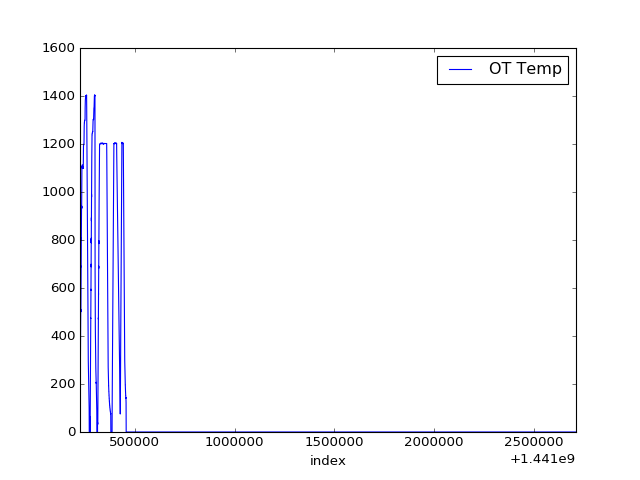

In [10]:
new_df = new_df.set_index('index')

output_file = root_folder + 'temperature_spectrum.csv'
new_df.to_csv(output_file, header=False)

if verbose:
    new_df.head()
    new_df.plot(y='OT Temp')